# Introduction
---
In this project, we will see what variables increase the charges from insurance. Then, we will look at the most significant variables.

# Introduction to dataset
---
We are given 6 features and 1 target variables. Three of the features are qualitative, the rest are quantitative. `BMI` is continuous, while the number of `children` is discrete, which makes sense, we can't have half a child. And the target variables, `charges` is continuous because it represents a money amount, which we know is a float and is not really countable. 

Qualitative Variables:
- Sex (str)
- Smoker (str)
- Region (str)

Quantitative Variables: 
- BMI (f64)
- Children (i64)
- Charges (f64)

# Understanding the data
---
To understand the data, we can look at the proportion of sex and region to see if it's balanced and just to see if maybe a certain region is paying more. Another thing we want to look at is the distribution of quantitative variables to check if there is a skewness in the data, if there are outliers. For children, we could also do something like a histogram since it's a discrete variable and we can assume that there's not going to be something extreme for the number of children. We can also just find the average number of children as well. The next thing we want to do is to encode the qualitative variables, so they are represented as numbers that map to a certain string value. The reason we do this is because most models don't accept string values, only numerical values. 

In [2]:
import kagglehub

path = kagglehub.dataset_download("mosapabdelghany/medical-insurance-cost-dataset")

/home/rojacobeus/Documents/projects/data-modeling-sp500-forecasting/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import polars as pl
from pathlib import Path

df = pl.read_csv(Path(path) / "insurance.csv")
df.head()

age,sex,bmi,children,smoker,region,charges
i64,str,f64,i64,str,str,f64
19,"""female""",27.9,0,"""yes""","""southwest""",16884.924
18,"""male""",33.77,1,"""no""","""southeast""",1725.5523
28,"""male""",33.0,3,"""no""","""southeast""",4449.462
33,"""male""",22.705,0,"""no""","""northwest""",21984.47061
32,"""male""",28.88,0,"""no""","""northwest""",3866.8552


In [21]:
df.null_count()

age,sex,bmi,children,smoker,region,charges
u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0


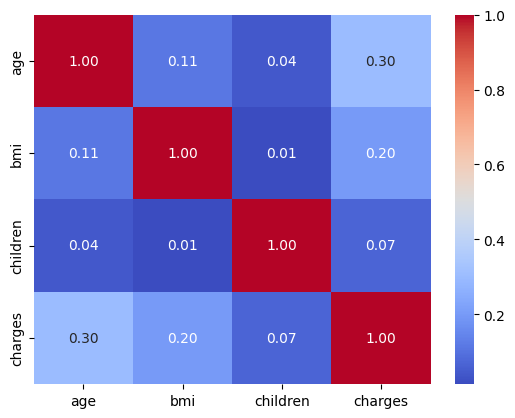

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = [col for col in df.columns if df[col].dtype in (pl.Float64, pl.Int64)]
corr = df.select(numeric_cols).corr()
sns.heatmap(data=corr, annot=True, cmap="coolwarm", fmt=".2f", xticklabels=numeric_cols, yticklabels=numeric_cols)
plt.show()

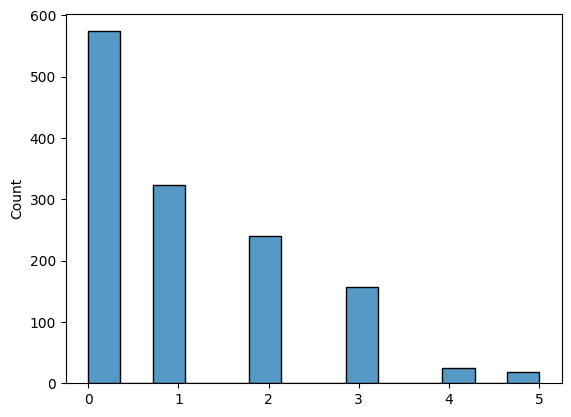

In [10]:
sns.histplot(data=df["children"])
plt.show()

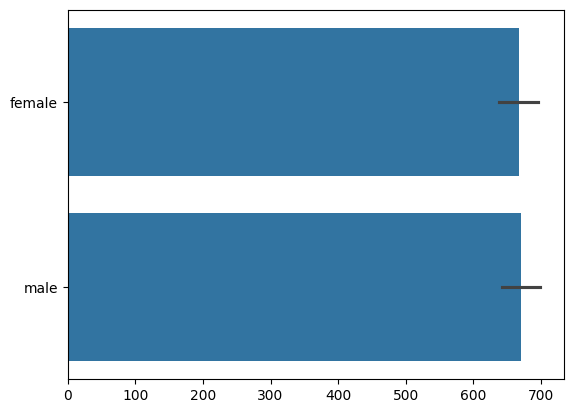

In [14]:
sns.barplot(data=df["sex"])
plt.show()

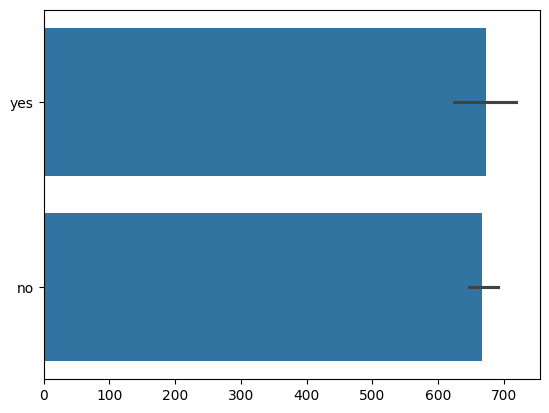

In [15]:
sns.barplot(data=df["smoker"])
plt.show()

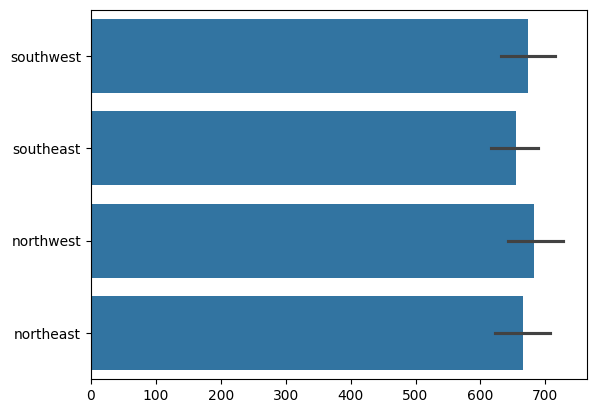

In [16]:
sns.barplot(data=df["region"])
plt.show()

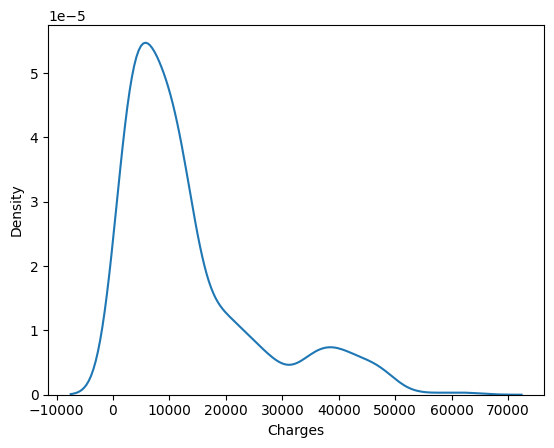

In [17]:
sns.kdeplot(data=df["charges"])
plt.xlabel("Charges")
plt.show()

In [23]:
df.describe()

statistic,age,sex,bmi,children,smoker,region,charges
str,f64,str,f64,f64,str,str,f64
"""count""",1338.0,"""1338""",1338.0,1338.0,"""1338""","""1338""",1338.0
"""null_count""",0.0,"""0""",0.0,0.0,"""0""","""0""",0.0
"""mean""",39.207025,null,30.663397,1.094918,null,null,13270.422265
"""std""",14.04996,null,6.098187,1.205493,null,null,12110.011237
"""min""",18.0,"""female""",15.96,0.0,"""no""","""northeast""",1121.8739
"""25%""",27.0,null,26.29,0.0,null,null,4738.2682
"""50%""",39.0,null,30.4,1.0,null,null,9386.1613
"""75%""",51.0,null,34.7,2.0,null,null,16657.71745
"""max""",64.0,"""male""",53.13,5.0,"""yes""","""southwest""",63770.42801


Charges are skewed to the right. Most charges are around $9,000. There are probably some outliers with extreme charges.

In [39]:
plot_mapping

{0: 'age',
 1: 'sex',
 2: 'bmi',
 3: 'children',
 4: 'smoker',
 5: 'region',
 6: 'charges'}

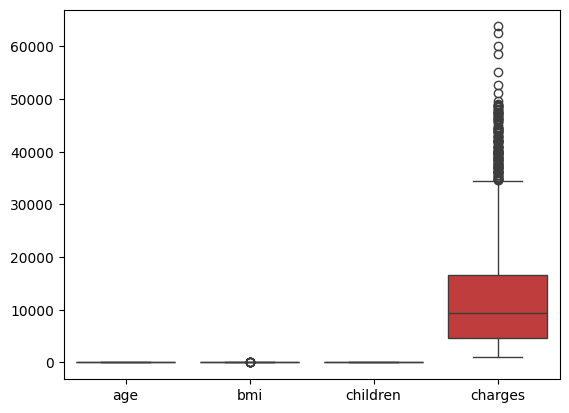

In [59]:
sns.boxplot(df[numeric_cols])
plt.xticks(ticks=list(range(len(numeric_cols))), labels=numeric_cols)
plt.show()